<a href="https://colab.research.google.com/github/EduardoFoncescaFinardi/DA_IA_IOT/blob/main/CP2-IA_AATT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DICIONARIO**


totalAtivo - O ativo total de uma empresa é a soma de todos os seus ativos, ou seja, seus bens e direitos. Dessa forma, inclui o ativo circulante, realizável a longo prazo e permanente, também chamado de não circulante. A definição de ativo na contabilidade é o conjunto de bens e direitos da organização.



In [111]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix


In [124]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [169]:
url = "/content/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[["margemBruta",  "faturamentoBruto", "totalPatrimonioLiquido"]]
df_sub.shape

(8973, 3)

In [170]:
esta_nula = df_sub['margemBruta'].isnull()
print(len(esta_nula))
esta_nula.head(8973)

8973


0       False
1        True
2       False
3       False
4       False
        ...  
8968     True
8969     True
8970     True
8971     True
8972     True
Name: margemBruta, Length: 8973, dtype: bool

In [171]:
df_sub.head()

,margemBruta,faturamentoBruto,totalPatrimonioLiquido
0,0.0,1766880.0,NaN
1,NaN,NaN,NaN
2,0.0,2814940.0,NaN
3,0.0,1285274.0,NaN
4,81459809.0,40779757.0,14544378.0


In [130]:
# df = df_sub.interpolate()
# Preencher os valores nulos com a média das colunas
df_sub['margemBruta'].fillna(df_sub['margemBruta'].mean(), inplace=True)
df_sub['ativoCirculante'].fillna(df_sub['ativoCirculante'].mean(), inplace=True)
df_sub['faturamentoBruto'].fillna(df_sub['faturamentoBruto'].mean(), inplace=True)


In [172]:
df.shape

(8973, 38)

In [175]:
#Filtrando registros com valores negativos nas colunas ativoCirculante e margemBruta
linhas_totalAtivo_margemBruta_faturamentoBruto = df_sub[(df_sub['totalPatrimonioLiquido'] >= 0) & (df_sub['margemBruta'] >= 0) & (df_sub['faturamentoBruto'] >= 0)]
print("Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:")
print(linhas_totalAtivo_margemBruta_faturamentoBruto)


Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:
      margemBruta  faturamentoBruto  totalPatrimonioLiquido
4      81459809.0        40779757.0              14544378.0
7       9357949.0        11958227.0               7519758.0
8       6233236.0        72479551.0              25612746.0
10       296634.0         4575646.0               2538787.0
15     10266414.0       538430217.0             111266414.0
...           ...               ...                     ...
8958   44612644.0       133280394.0               1893943.0
8959    2322234.0         4887005.0                905806.0
8960     246578.0         5392166.0                     0.0
8961   38587967.0       119702196.0              25603650.0
8963    2548248.0         4699829.0               2735358.0

[4479 rows x 3 columns]


In [176]:
linhas_totalAtivo_margemBruta_faturamentoBruto.shape

(4479, 3)

In [177]:
linhas_totalAtivo_margemBruta_faturamentoBruto.describe()

,margemBruta,faturamentoBruto,totalPatrimonioLiquido
count,4.479000e+03,4.479000e+03,4.479000e+03
mean,2.877632e+07,9.231138e+07,3.015200e+07
std,1.547519e+08,4.462694e+08,2.646927e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.911500e+05,2.303078e+06,3.249610e+05
50%,2.337574e+06,8.275617e+06,1.831038e+06
75%,1.030310e+07,3.204576e+07,8.512268e+06
max,3.366843e+09,6.426115e+09,1.292328e+10


In [178]:
condicoes_grupo_1 = [
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 0.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalPatrimonioLiquido'] <= 324961.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 2278600.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 2332812.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalPatrimonioLiquido'] <= 1831038.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 80232850.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 10139079.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalPatrimonioLiquido'] <= 8512267.5) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 31613710.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 3366842514.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalPatrimonioLiquido'] <= 12923280000.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 6426115000.0)
]

condicoes_grupo_2 = [
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 203377.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 2332812.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 10139079.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 3366842514.0)
]

opcoes_grupo_1 = ['muito pequena', 'pequena', 'grande', 'muito grande']
opcoes_grupo_2 = ['muito pequena', 'pequena', 'grande', 'muito grande']

grupo_1 = np.select(condicoes_grupo_1, opcoes_grupo_1)
grupo_2 = np.select(condicoes_grupo_2, opcoes_grupo_2)

grupo_final = np.where(grupo_1 != None, grupo_1, grupo_2)

linhas_totalAtivo_margemBruta_faturamentoBruto['porte'] = grupo_final

In [179]:
#DataSet com a coluna grupo adicionada e os devidos valores
linhas_totalAtivo_margemBruta_faturamentoBruto.head(8900)

,margemBruta,faturamentoBruto,totalPatrimonioLiquido,porte
4,81459809.0,40779757.0,14544378.0,muito grande
7,9357949.0,11958227.0,7519758.0,grande
8,6233236.0,72479551.0,25612746.0,muito grande
10,296634.0,4575646.0,2538787.0,pequena
15,10266414.0,538430217.0,111266414.0,muito grande
...,...,...,...,...
8958,44612644.0,133280394.0,1893943.0,muito grande
8959,2322234.0,4887005.0,905806.0,pequena
8960,246578.0,5392166.0,0.0,pequena
8961,38587967.0,119702196.0,25603650.0,muito grande


In [182]:
esta_nula = linhas_totalAtivo_margemBruta_faturamentoBruto['porte'].isnull()
print(len(esta_nula))

4479


In [183]:
linhas_totalAtivo_margemBruta_faturamentoBruto.isnull().sum()

margemBruta               0
faturamentoBruto          0
totalPatrimonioLiquido    0
porte                     0
dtype: int64

In [184]:
linhas_totalAtivo_margemBruta_faturamentoBruto.shape

(4479, 4)

In [185]:
linhas_totalAtivo_margemBruta_faturamentoBruto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4479 entries, 4 to 8963
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   margemBruta             4479 non-null   float64
 1   faturamentoBruto        4479 non-null   float64
 2   totalPatrimonioLiquido  4479 non-null   float64
 3   porte                   4479 non-null   object 
dtypes: float64(3), object(1)
memory usage: 175.0+ KB


In [186]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()


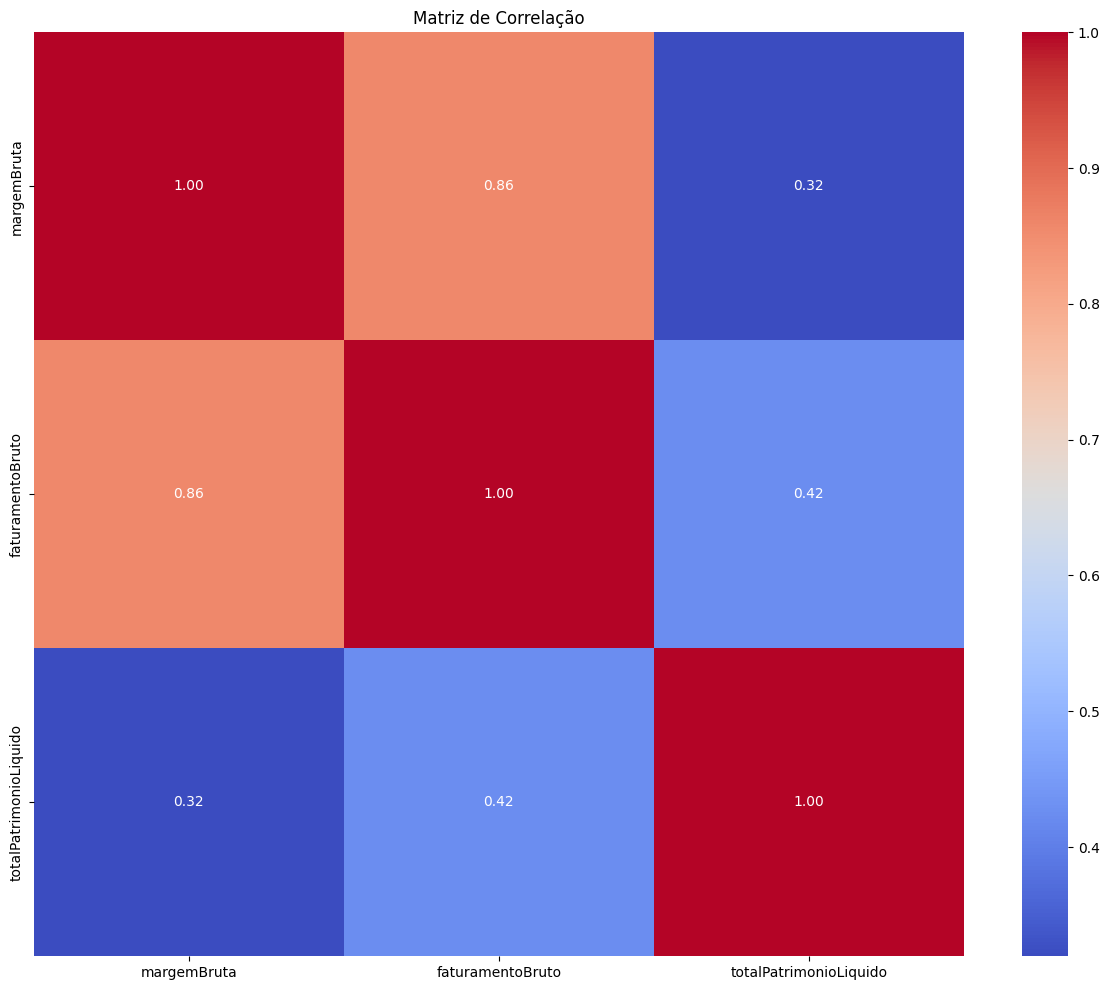

In [187]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [146]:
df = linhas_totalAtivo_margemBruta_faturamentoBruto.dropna()

In [147]:
df.shape

(8904, 4)

In [148]:
df.isnull().sum()

margemBruta         0
faturamentoBruto    0
ativoCirculante     0
porte               0
dtype: int64

In [149]:
X = df.drop(columns=["porte"])
y = df["porte"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [151]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [152]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [153]:
y_pred = rf.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 1.00


In [155]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [156]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [157]:
y_pred = gbm.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

Acurácia do modelo Gradient Boosting: 1.00


In [159]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [160]:
y_predicoes = lda.predict(X_test)

In [161]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.7634730538922155

In [162]:
input_values = [[203377.0, 1068988.0, 2278600.0], [3366842514.0, 548235000.0, 6426115000.0], [10139079.0, 1928754.0, 31613710.0]]  # Substitua pelos seus próprios valores

# Testando o modelo com os valores de entrada
for values in input_values:
    prediction = test_model(rf, values)
    print("Valores de entrada:", values)
    print("Previsão de porte:", prediction)
    print()

Valores de entrada: [203377.0, 1068988.0, 2278600.0]
Previsão de porte: ['muito pequena']

Valores de entrada: [3366842514.0, 548235000.0, 6426115000.0]
Previsão de porte: ['muito pequena']

Valores de entrada: [10139079.0, 1928754.0, 31613710.0]
Previsão de porte: ['muito pequena']



# **TESTE**

In [256]:
url = "/content/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[["ativoCirculante", "totalAtivo", "duplicatasAReceber"]]
df_sub.shape

(8973, 3)

In [257]:
# Removendo linhas com pelo menos um NaN
df_limpo = df_sub.dropna()

print("\nDataFrame Após Remover Linhas com NaN:")
print(df_limpo)


DataFrame Após Remover Linhas com NaN:
      ativoCirculante  totalAtivo  duplicatasAReceber
4          14758917.0  25793410.0          11797928.0
7          17801610.0  19415777.0           3742963.0
8          36827690.0  39455945.0          15980275.0
10          2127907.0   3609498.0            973971.0
11          5369982.0   5595689.0            115000.0
...               ...         ...                 ...
8958       20070708.0  20290799.0          11285664.0
8959        4943835.0   5633038.0           3471368.0
8960              0.0         0.0                 0.0
8961       38305921.0  40876769.0          15784605.0
8963        3413036.0   3850888.0           2473428.0

[4733 rows x 3 columns]


In [251]:
df_sub['ativoCirculante'].fillna(df_sub['ativoCirculante'].mean(), inplace=True)
df_sub['totalAtivo'].fillna(df_sub['totalAtivo'].mean(), inplace=True)
df_sub['duplicatasAReceber'].fillna(df_sub['duplicatasAReceber'].mean(), inplace=True)

df_sub.dropna()

,ativoCirculante,totalAtivo,duplicatasAReceber
0,4.451028e+07,7.073623e+07,1.663397e+07
1,4.451028e+07,7.073623e+07,1.663397e+07
2,4.451028e+07,7.073623e+07,1.663397e+07
3,4.451028e+07,7.073623e+07,1.663397e+07
4,1.475892e+07,2.579341e+07,1.179793e+07
...,...,...,...
8968,4.451028e+07,7.073623e+07,1.663397e+07
8969,4.451028e+07,7.073623e+07,1.663397e+07
8970,4.451028e+07,7.073623e+07,1.663397e+07
8971,4.451028e+07,7.073623e+07,1.663397e+07


In [258]:
linhas_totalAtivo_margemBruta_faturamentoBruto = df_sub[(df_sub['ativoCirculante'] >= 0) & (df_sub['totalAtivo'] >= 0) & (df_sub['duplicatasAReceber'] >= 0)]
print("Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:")
print(linhas_totalAtivo_margemBruta_faturamentoBruto)

Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:
      ativoCirculante  totalAtivo  duplicatasAReceber
4          14758917.0  25793410.0          11797928.0
7          17801610.0  19415777.0           3742963.0
8          36827690.0  39455945.0          15980275.0
10          2127907.0   3609498.0            973971.0
11          5369982.0   5595689.0            115000.0
...               ...         ...                 ...
8958       20070708.0  20290799.0          11285664.0
8959        4943835.0   5633038.0           3471368.0
8960              0.0         0.0                 0.0
8961       38305921.0  40876769.0          15784605.0
8963        3413036.0   3850888.0           2473428.0

[4728 rows x 3 columns]


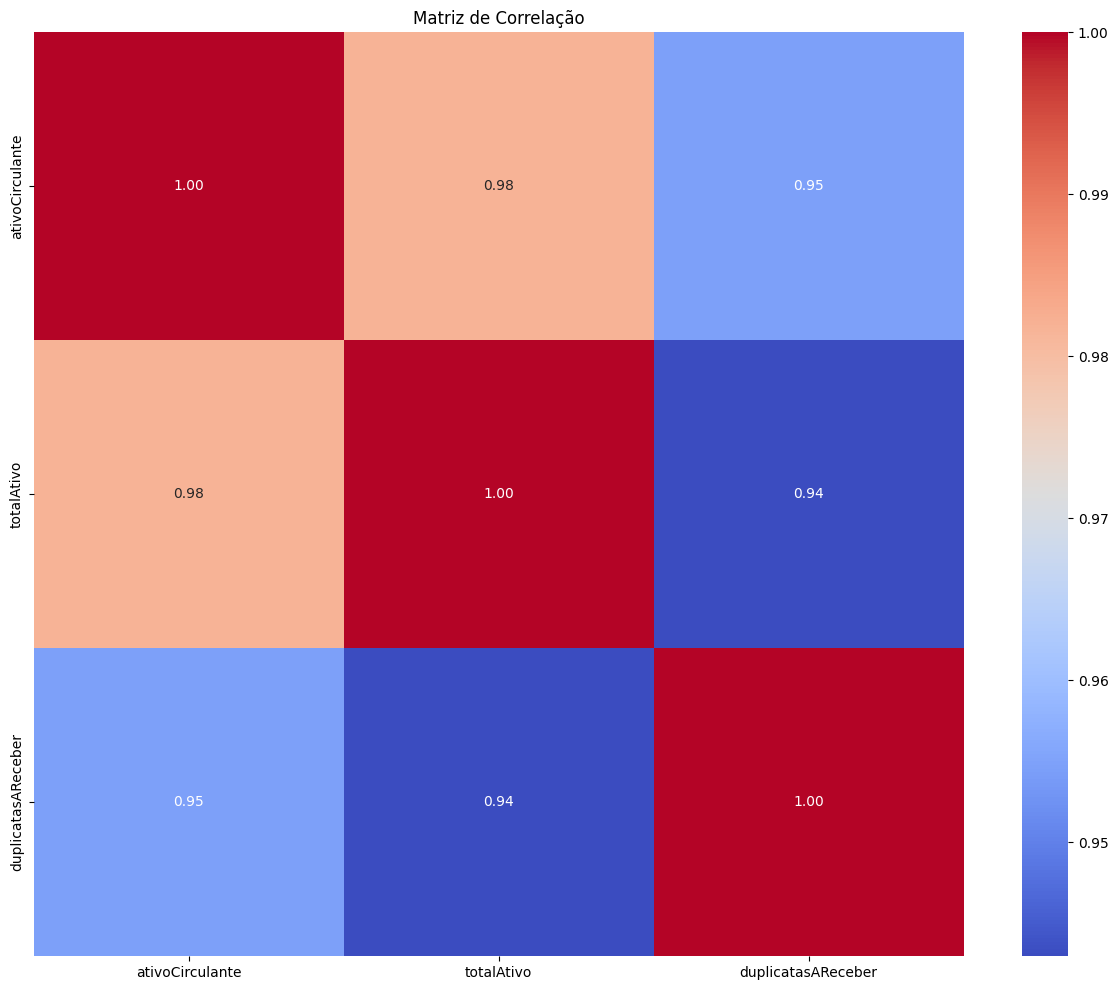

In [253]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [254]:
linhas_totalAtivo_margemBruta_faturamentoBruto.describe()

,ativoCirculante,totalAtivo,duplicatasAReceber
count,8.968000e+03,8.968000e+03,8.968000e+03
mean,4.450109e+07,7.072476e+07,1.664861e+07
std,3.395730e+08,6.449925e+08,2.164071e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.344736e+06,3.952530e+06,9.212125e+05
50%,4.451028e+07,7.073623e+07,1.663397e+07
75%,4.451028e+07,7.073623e+07,1.663397e+07
max,2.903832e+10,5.482350e+10,2.009358e+10


In [266]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

df_sub.interpolate()

df_filtered = df_sub[(df_sub['ativoCirculante'] >= 0) & (df_sub['totalAtivo'] >= 0) & (df_sub['duplicatasAReceber'] >= 0)]

df_sub = df[["ativoCirculante", "totalAtivo", "duplicatasAReceber"]]

condicoes_grupo_1 = [
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 3344735.75) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 3952530.5) & (linhas_totalAtivo_margemBruta_faturamentoBruto['duplicatasAReceber'] <= 921212.5),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 44510281.2) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 70736227.5) & (linhas_totalAtivo_margemBruta_faturamentoBruto['duplicatasAReceber'] <= 16633967.4),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 44510281.2) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 70736227.5) & (linhas_totalAtivo_margemBruta_faturamentoBruto['duplicatasAReceber'] <= 16633967.4),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 29038320000.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 54823500000.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['duplicatasAReceber'] <= 20093580000.0)
]

condicoes_grupo_2 = [
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 203377.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 2332812.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 10139079.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['ativoCirculante'] <= 3366842514.0)
]

opcoes_grupo_1 = ['muito pequena', 'pequena', 'grande', 'muito grande']
opcoes_grupo_2 = ['muito pequena', 'pequena', 'grande', 'muito grande']

grupo_1 = np.select(condicoes_grupo_1, opcoes_grupo_1)
grupo_2 = np.select(condicoes_grupo_2, opcoes_grupo_2)

grupo_final = np.where(grupo_1 != None, grupo_1, grupo_2)

linhas_totalAtivo_margemBruta_faturamentoBruto['porte'] = grupo_final

X = linhas_totalAtivo_margemBruta_faturamentoBruto.drop(columns=["porte"])
y = linhas_totalAtivo_margemBruta_faturamentoBruto["porte"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy_rf))

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train_scaled, y_train)
y_pred_gbm = gbm.predict(X_test_scaled)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy_gbm))

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Acurácia do modelo Linear Discriminant Analysis: {:.2f}".format(accuracy_lda))
input_values = [[203377.0, 1068988.0, 2278600.0], [3366842514.0, 548235000.0, 6426115000.0], [10139079.0, 1928754.0, 31613710.0]]

def test_model(model, values):
   scaled_values = scaler.transform([values])
   prediction = model.predict(scaled_values)
   return prediction

for values in input_values:
   prediction_rf = test_model(rf, values)
   prediction_gbm = test_model(gbm, values)
   prediction_lda = test_model(lda, values)
   print("Valores de entrada:", values)
   print("Previsão de porte (Random Forest):", prediction_rf)
   print("Previsão de porte (Gradient Boosting):", prediction_gbm)
   print("Previsão de porte (Linear Discriminant Analysis):", prediction_lda)
   print()

Acurácia do modelo Random Forest: 1.00
Acurácia do modelo Gradient Boosting: 1.00
Acurácia do modelo Linear Discriminant Analysis: 0.50
Valores de entrada: [203377.0, 1068988.0, 2278600.0]
Previsão de porte (Random Forest): ['pequena']
Previsão de porte (Gradient Boosting): ['pequena']
Previsão de porte (Linear Discriminant Analysis): ['pequena']

Valores de entrada: [3366842514.0, 548235000.0, 6426115000.0]
Previsão de porte (Random Forest): ['muito grande']
Previsão de porte (Gradient Boosting): ['muito grande']
Previsão de porte (Linear Discriminant Analysis): ['muito grande']

Valores de entrada: [10139079.0, 1928754.0, 31613710.0]
Previsão de porte (Random Forest): ['muito grande']
Previsão de porte (Gradient Boosting): ['muito grande']
Previsão de porte (Linear Discriminant Analysis): ['pequena']

